In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-ml-w6p1/submit.csv
/kaggle/input/2024-ml-w6p1/train.csv
/kaggle/input/2024-ml-w6p1/test.csv
/kaggle/input/2024-ml-w6p1/train_label.csv


In [2]:
import random
import os

seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [3]:
#데이터셋 로드
train_label = pd.read_csv('/kaggle/input/2024-ml-w6p1/train_label.csv')
train = pd.read_csv('/kaggle/input/2024-ml-w6p1/train.csv')
test = pd.read_csv('/kaggle/input/2024-ml-w6p1/test.csv')
submit = pd.read_csv('/kaggle/input/2024-ml-w6p1/submit.csv')

In [4]:
#라벨 확인
train_label.head()

,id,label
0,0,136
1,1,90
2,2,112
3,3,165
4,4,73


In [5]:
#label 추출
label = train_label['label'].values

In [6]:
#데이터 분류
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(train,label, test_size=0.3, random_state=seed, stratify=label)

In [7]:
#LDA 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(x_train, y_train) 

#예측
y_train_pred = lda.predict(x_train)
y_test_pred = lda.predict(x_test)

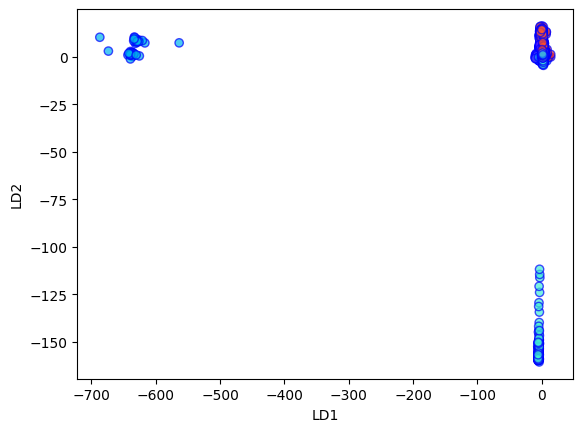

In [8]:
#분포 그리기
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    x_lda[:,0],
    x_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [9]:
#분류 성능
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

#분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

0.6889875574371418
0.5892556010599855
[[ 5  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [10]:
#QDA 학습
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train) # QDA 적합
y_train_pred=qda.predict(x_train)
y_test_pred=qda.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


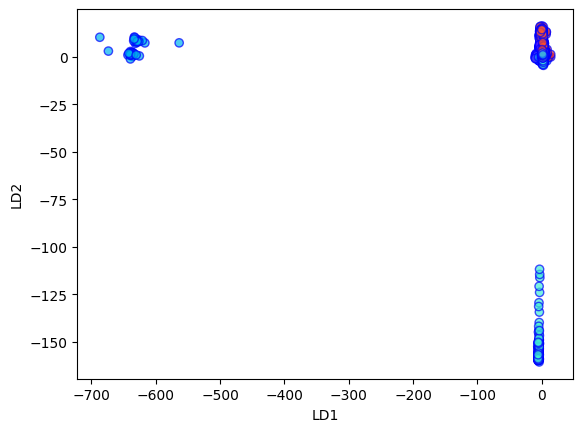

In [11]:
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    x_lda[:,0],
    x_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [12]:
#분류 성능
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

#분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

0.9991739377355568
0.3312454830161407
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
#전체 테스트 데이터에 대해 학습
lda.fit(train, label)
test_pred = lda.predict(test) #예측

In [14]:
#제출
submit['label'] = test_pred
submit.to_csv('submit.csv', index=False)